In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [49]:
df = pd.read_csv('datasets/gym_members_exercise_tracking.csv')
df_2 = df.copy()

df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


### General Info Of The Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

### Check NULL Values

In [4]:
# check null values
df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

### Check Duplicated Rows

In [5]:
df.duplicated().sum()

np.int64(0)

### Categorize People

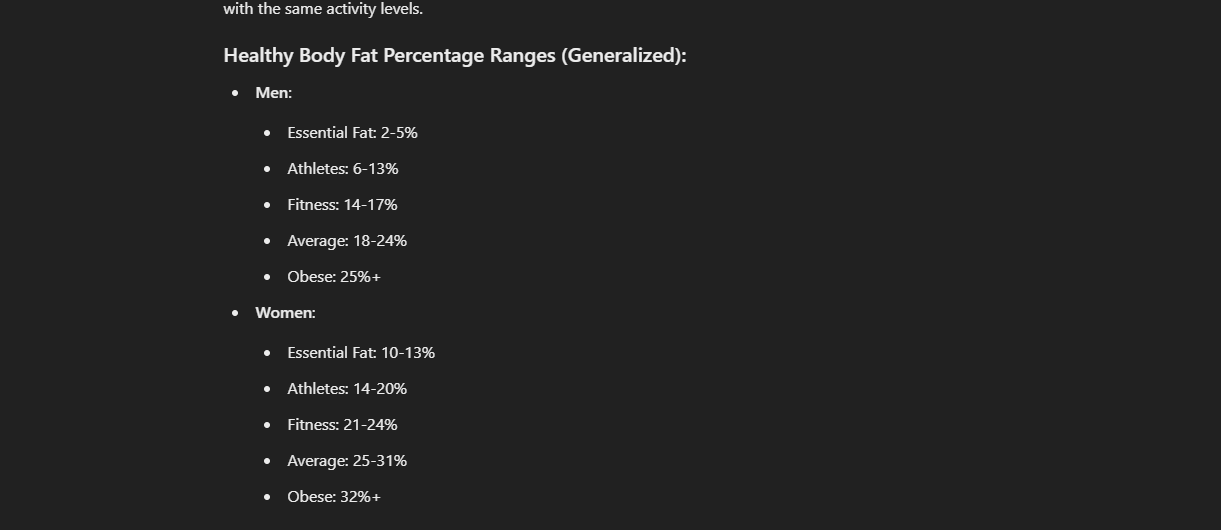

In [6]:
def categorize_fat(row):
    # Male
    if row['Gender'] == 'Male':
        if row['Fat_Percentage'] >= 2 and row['Fat_Percentage'] <= 5:
            return 'Essential Fat'
        elif row['Fat_Percentage'] >= 6 and row['Fat_Percentage'] <= 13:
            return 'Super Lean'
        elif row['Fat_Percentage'] >= 14 and row['Fat_Percentage'] <= 17:
            return 'Lean'
        elif row['Fat_Percentage'] >= 18 and row['Fat_Percentage'] <= 24:
            return 'Average'
        else:
            return 'High Fat'
    # Female
    else:
        if row['Fat_Percentage'] >= 10 and row['Fat_Percentage'] <= 13:
            return 'Essential Fat'
        elif row['Fat_Percentage'] >= 14 and row['Fat_Percentage'] <= 20:
            return 'Super Lean'
        elif row['Fat_Percentage'] >= 21 and row['Fat_Percentage'] <= 24:
            return 'Lean'
        elif row['Fat_Percentage'] >= 25 and row['Fat_Percentage'] <= 31:
            return 'Average'
        else:
            return 'High Fat'

df['Fat_category'] = df.apply(categorize_fat, axis=1) 
df.sample(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Fat_category
562,25,Male,120.6,1.83,179,120,51,1.04,686.0,Cardio,22.3,2.5,3,2,36.01,Average
13,41,Male,94.5,2.00,179,136,69,1.18,794.0,HIIT,27.6,3.7,3,1,23.62,High Fat
537,31,Female,42.7,1.76,182,121,65,1.46,883.0,Strength,34.9,2.2,3,1,13.78,High Fat
908,26,Male,51.9,2.00,173,133,54,0.75,549.0,HIIT,26.6,2.3,2,1,12.97,High Fat
132,49,Male,82.8,1.95,183,159,73,1.91,1503.0,Yoga,14.3,3.5,5,3,21.78,Lean
614,28,Male,128.4,1.86,173,158,71,1.06,921.0,Strength,23.6,3.3,4,2,37.11,Average
26,44,Male,65.2,1.80,192,139,68,0.73,502.0,HIIT,27.2,2.7,2,1,20.12,High Fat
74,41,Male,94.1,1.62,172,139,50,1.13,777.0,Cardio,23.4,3.1,4,2,35.86,Average
366,42,Male,76.4,1.97,165,157,65,1.14,886.0,HIIT,22.9,2.6,3,2,19.69,Average
371,32,Male,68.3,1.92,168,165,54,1.42,1289.0,Strength,29.9,3.5,2,1,18.53,High Fat


### Pie Chart

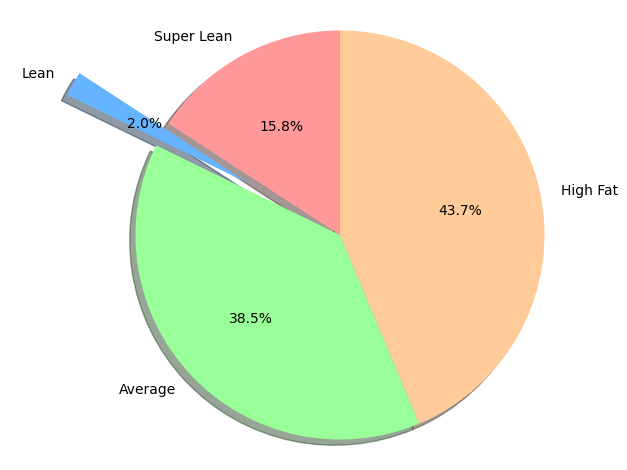

In [7]:
# Calculate counts for each category
super_lean = df.loc[df['Fat_category'] == 'Super Lean'].shape[0]
lean = df.loc[df['Fat_category'] == 'Lean'].shape[0]
average = df.loc[df['Fat_category'] == 'Average'].shape[0]
high_fat = df.loc[df['Fat_category'] == 'High Fat'].shape[0]

# Pie chart
labels = ['Super Lean', 'Lean', 'Average', 'High Fat']
sizes = [super_lean, lean, average, high_fat]
explodes = (0, 0.5, 0, 0)

# Add colors and explode for visualization
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explodes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
strength_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Strength'] / df['Session_Duration (hours)']).mean()
print("Strength : ", strength_avg_cal)

cardio_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Cardio'] / df['Session_Duration (hours)']).mean()
print("Cardio : ", cardio_avg_cal)

yoga_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'Yoga'] / df['Session_Duration (hours)']).mean()
print("Yoga : ", yoga_avg_cal)

hiit_avg_cal = (df['Calories_Burned'].loc[df['Workout_Type'] == 'HIIT'] / df['Session_Duration (hours)']).mean()
print("HIIT : ", hiit_avg_cal)

Strength :  723.9950441252573
Cardio :  723.8479923442371
Yoga :  716.5192284403885
HIIT :  716.5150989407075


## SCATTER PLOTS

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

['Yoga' 'HIIT' 'Cardio' 'Strength']
0      0
1      1
2      2
3      3
4      3
      ..
968    3
969    3
970    2
971    1
972    3
Name: Workout_Type, Length: 973, dtype: int64


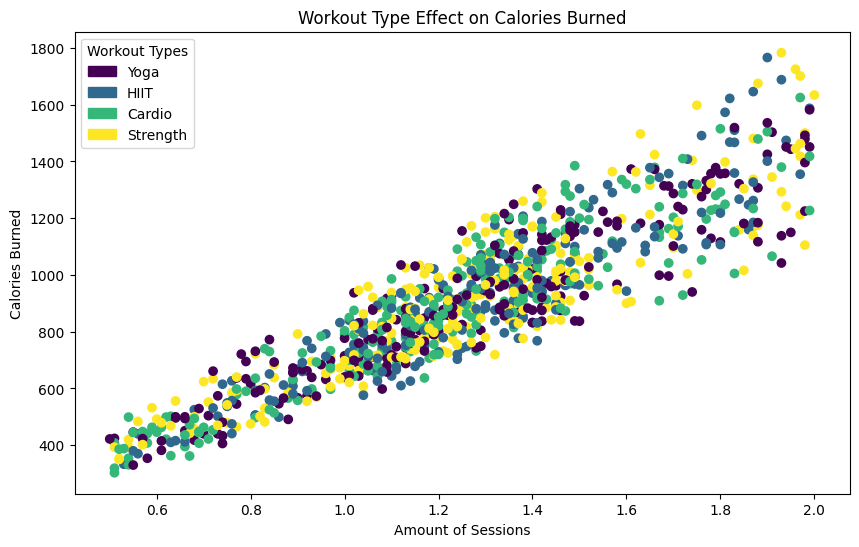

In [10]:
import matplotlib.patches as mpatches

# Define workout types and their corresponding colors
workout_types = df['Workout_Type'].unique()
print(workout_types)
workout_type_to_color = {wt: i for i, wt in enumerate(workout_types)}
t = df['Workout_Type'].map(workout_type_to_color)
print(t)

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Session_Duration (hours)'], df['Calories_Burned'], c=t, alpha=1, cmap='viridis')
# Add labels and title
plt.xlabel('Amount of Sessions')
plt.ylabel('Calories Burned')
plt.title('Workout Type Effect on Calories Burned')

# Create a legend
# mpathes.Patch it would just create the legend
# scatter.map is the colormap from the cmap viridis which we set and map the normalized values to actual colors
# scatter.norm is to normalize the number from the workout_type_to_color to range 0 to 1
handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(workout_type_to_color[wt])), label=wt)
    for wt in workout_types
]

plt.legend(handles=handles, title="Workout Types", loc="upper left")  # Customize title and position

# Show the plot
plt.show()

### Seperates Categorical Data from Preprocessing and Dimensionality Reduction Step

In [50]:
df_2.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [51]:
categorical_data = df_2[['Gender', 'Workout_Type']]
df_2.drop(columns=['Gender', 'Workout_Type'], axis=1, inplace=True)

categorical_data.head()

,Gender,Workout_Type
0,Male,Yoga
1,Female,HIIT
2,Female,Cardio
3,Male,Strength
4,Male,Strength


In [52]:
# perform one-hot-encoding on categorical features that we will use later
encoded_genders = pd.get_dummies(categorical_data['Gender'], prefix='Gender', drop_first=False).astype('int')
encoded_wt = pd.get_dummies(categorical_data['Workout_Type'], prefix='WT', drop_first=False).astype('int')

categorical_data = pd.concat([categorical_data, encoded_genders, encoded_wt], axis=1)
categorical_data.drop(columns=['Gender', 'Workout_Type'], inplace=True)

categorical_data.head()

,Gender_Female,Gender_Male,WT_Cardio,WT_HIIT,WT_Strength,WT_Yoga
0,0,1,0,0,0,1
1,1,0,0,1,0,0
2,1,0,1,0,0,0
3,0,1,0,0,1,0
4,0,1,0,0,1,0


In [ ]:
# drop unnecessary features
new_df_2 = df_2.drop(columns=['Resting_BPM', 'Height (m)', 'Experience_Level', 'BMI', 'Water_Intake (liters)', 'Weight (kg)'])

In [54]:
new_df_2.head()

,Age,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week)
0,56,180,157,1.69,1313.0,12.6,4
1,46,179,151,1.30,883.0,33.9,4
2,32,167,122,1.11,677.0,33.4,4
3,25,190,164,0.59,532.0,28.8,3
4,38,188,158,0.64,556.0,29.2,3


### Apply Standardization

In [55]:
# store the columns
columns = new_df_2.columns.tolist()
print(columns)
print(type(columns))

['Age', 'Max_BPM', 'Avg_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Workout_Frequency (days/week)']
<class 'list'>


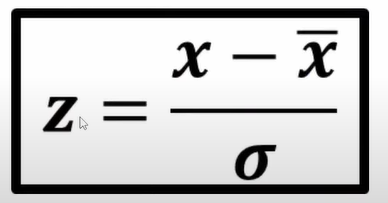

In [56]:
scaler = StandardScaler()
new_df_2 = scaler.fit_transform(new_df_2)

# note that here the df got converted to numpy array after being applied standardization 
print(type(new_df_2))

<class 'numpy.ndarray'>


In [57]:
# convert back to dataframe
new_df_2 = pd.DataFrame(new_df_2, columns=columns)

# as you can see here our mean and std(standard deviation becomes 1 which means there are no variables or features that are dominating to other features in scale)
new_df_2.describe().round(2)

,Age,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week)
count,973.00,973.00,973.00,973.00,973.00,973.00,973.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.70,-1.73,-1.66,-2.21,-2.21,-2.39,-1.45
25%,-0.88,-0.86,-0.89,-0.63,-0.68,-0.59,-0.35
50%,0.11,0.01,-0.05,0.01,-0.05,0.20,-0.35
75%,0.85,0.88,0.85,0.59,0.63,0.69,0.74
max,1.67,1.66,1.76,2.17,3.22,1.60,1.84


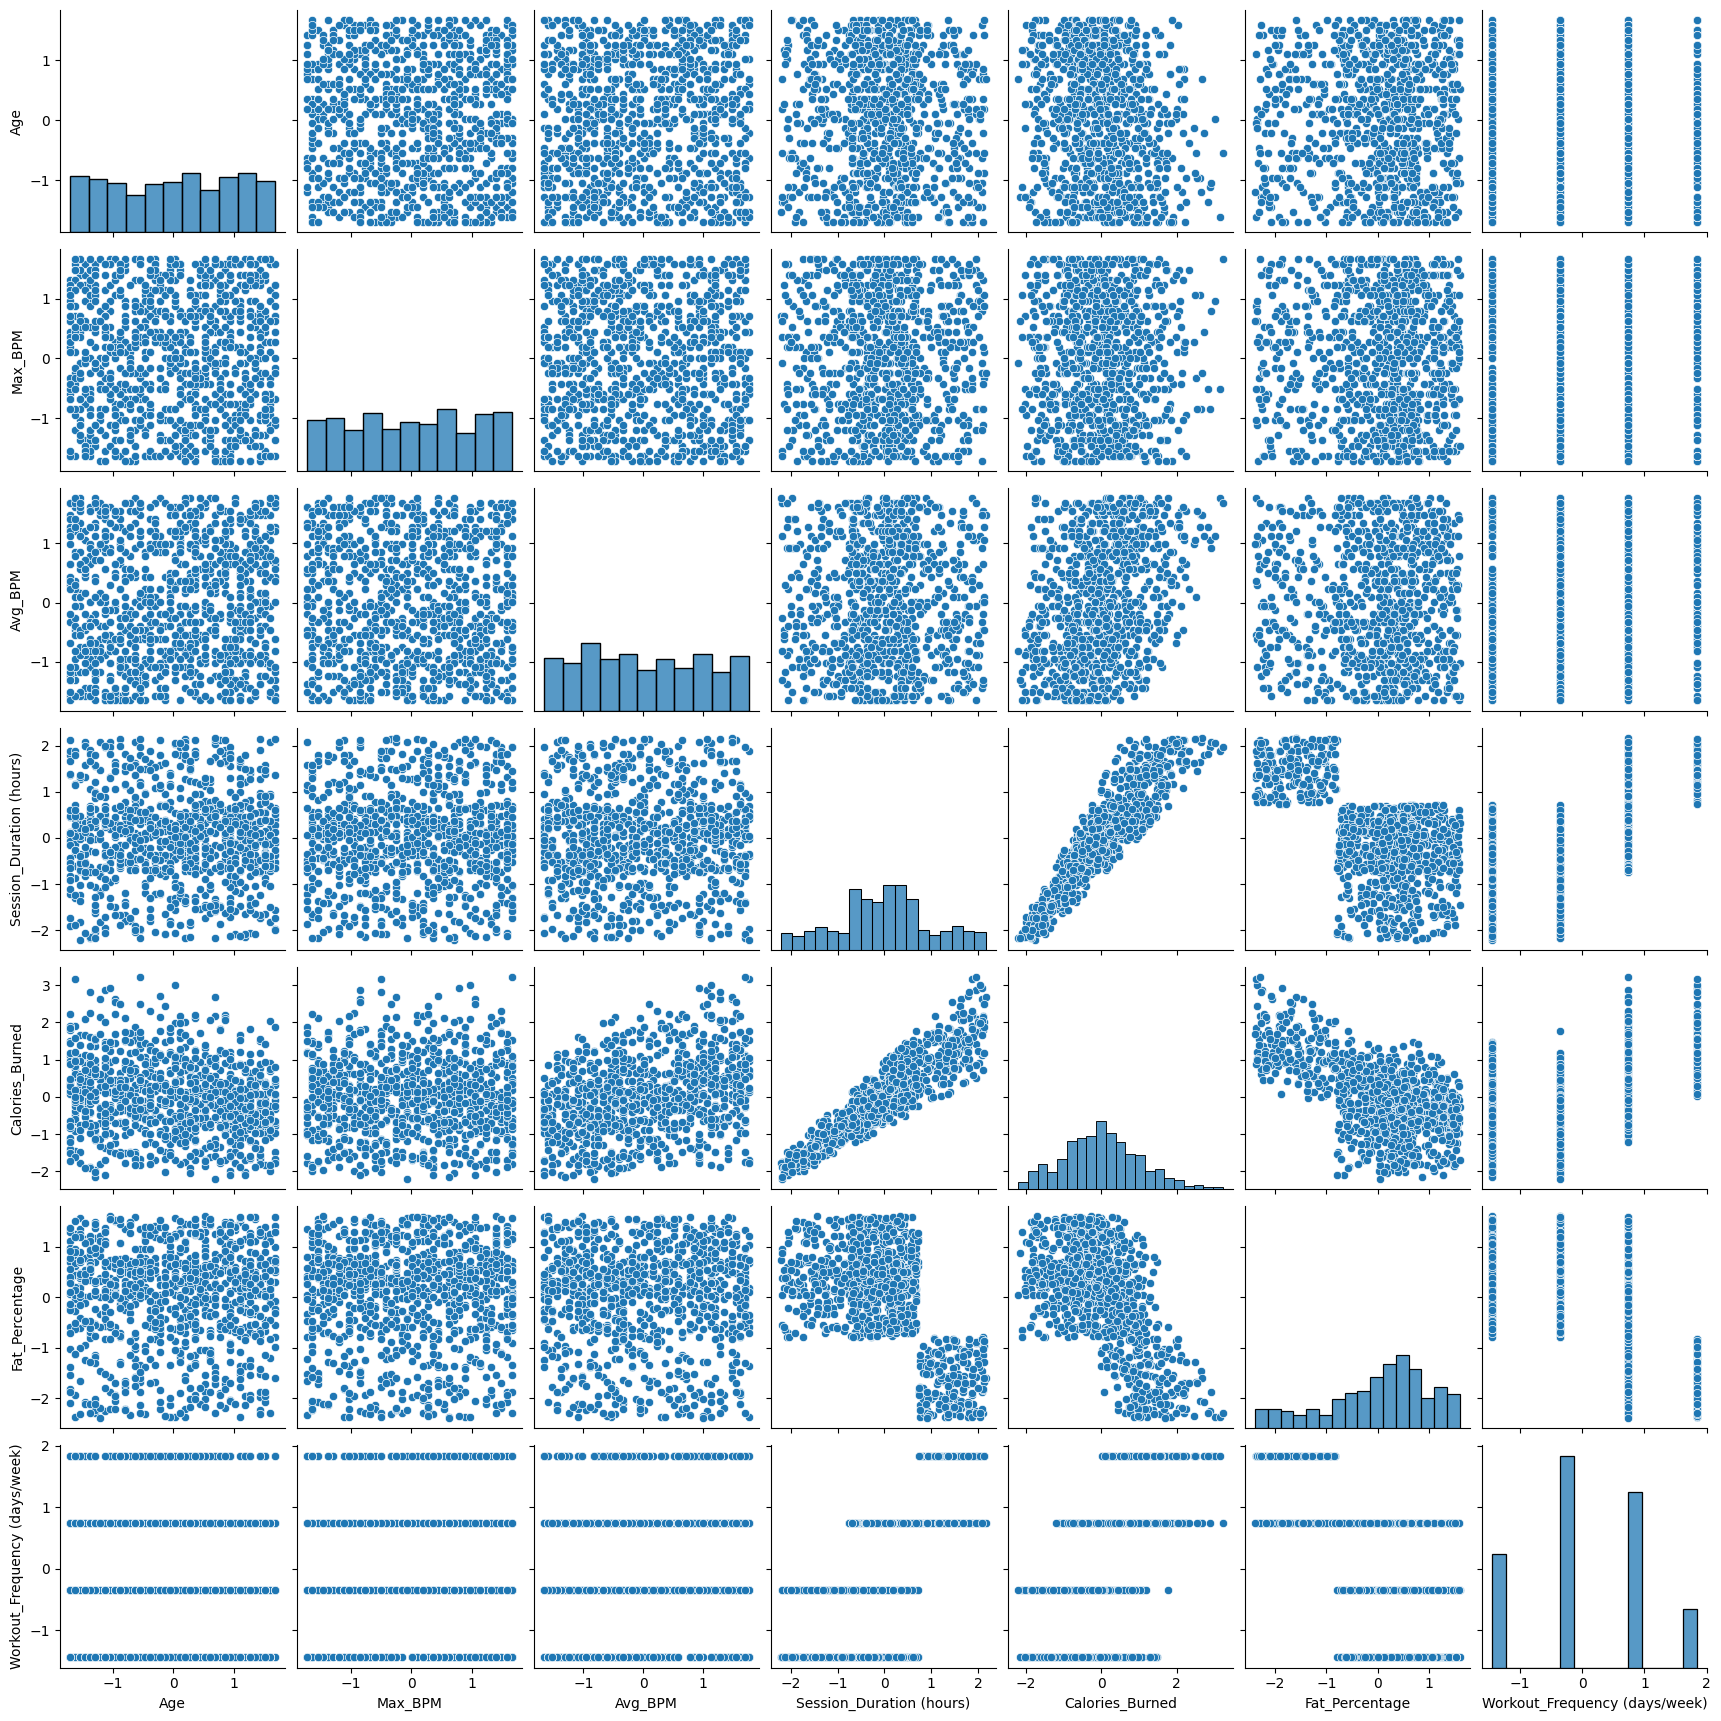

In [58]:
# visualize our data using pairplot from seaborn
# as we can see here the range changes to the min and max after getting standardized
sns.pairplot(new_df_2)

In [59]:
new_df_2 = new_df_2.round(2)
new_df_2

,Age,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week)
0,1.42,0.01,0.92,1.26,1.50,-1.98,0.74
1,0.60,-0.08,0.50,0.13,-0.08,1.43,0.74
2,-0.55,-1.12,-1.52,-0.43,-0.84,1.35,0.74
3,-1.12,0.88,1.41,-1.94,-1.37,0.61,-0.35
4,-0.06,0.70,0.99,-1.80,-1.28,0.68,-0.35
...,...,...,...,...,...,...,...
968,-1.21,0.62,0.99,0.91,1.68,-2.39,0.74
969,-1.12,0.36,1.55,0.36,1.30,0.00,-1.45
970,1.67,1.23,-1.66,1.35,0.09,-0.99,1.84
971,-0.55,1.57,0.16,-0.46,-0.08,0.52,-0.35


In [60]:
# check mean and std
print(new_df_2.mean().round(2))
print(new_df_2.std().round(2))

Age                             -0.0
Max_BPM                         -0.0
Avg_BPM                         -0.0
Session_Duration (hours)        -0.0
Calories_Burned                 -0.0
Fat_Percentage                   0.0
Workout_Frequency (days/week)   -0.0
dtype: float64
Age                              1.0
Max_BPM                          1.0
Avg_BPM                          1.0
Session_Duration (hours)         1.0
Calories_Burned                  1.0
Fat_Percentage                   1.0
Workout_Frequency (days/week)    1.0
dtype: float64


### Apply PCA (Principal Component Analysis)

In [61]:
# after we apply standardization, that steps is crucial for PCA. In this datasets, even after dropping the obvious features like height, experience level, or etc in terms of predicting calories burned later in our model, our datasets still holds too high dimensionalities which we would like to reduce it by keeping the important features only by applying PCA

# Initiate PCA instance
pca = PCA(n_components=3) # lets try decompose our df to 2 features only
pca_df = pca.fit_transform(new_df_2)

# data after being applied PCA
# Convert the result into a DataFrame for easier readability
pca_df = pd.DataFrame(pca_df, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
print(pca_df)

# explained the variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print('Variance Ratio : ', explained_variance_ratio)

# check the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Ratio : ", cumulative_variance)

     Principal Component 1  Principal Component 2  Principal Component 3
0                 2.737109               0.668190               1.211801
1                -0.256308               0.575437               0.465742
2                -1.070252              -1.045769               0.316207
3                -2.027982               0.895802              -1.498589
4                -2.023583               0.677685              -0.467943
..                     ...                    ...                    ...
968               2.954517               0.344121              -1.312898
969               0.430962               1.655596              -1.759289
970               1.818228              -2.337196               1.571020
971              -0.647207              -0.271424              -1.270967
972              -2.454559               0.792191               0.874611

[973 rows x 3 columns]
Variance Ratio :  [0.42278504 0.15658776 0.14723843]
Cumulative Explained Ratio :  [0.42278504 0.579

In [62]:
new_df_2.columns.tolist()

['Age',
 'Max_BPM',
 'Avg_BPM',
 'Session_Duration (hours)',
 'Calories_Burned',
 'Fat_Percentage',
 'Workout_Frequency (days/week)']

### Concat The Categorical Data Back


In [63]:
new_df_2 = pd.concat([new_df_2, categorical_data], axis=1)
new_df_2

,Age,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Gender_Female,Gender_Male,WT_Cardio,WT_HIIT,WT_Strength,WT_Yoga
0,1.42,0.01,0.92,1.26,1.50,-1.98,0.74,0,1,0,0,0,1
1,0.60,-0.08,0.50,0.13,-0.08,1.43,0.74,1,0,0,1,0,0
2,-0.55,-1.12,-1.52,-0.43,-0.84,1.35,0.74,1,0,1,0,0,0
3,-1.12,0.88,1.41,-1.94,-1.37,0.61,-0.35,0,1,0,0,1,0
4,-0.06,0.70,0.99,-1.80,-1.28,0.68,-0.35,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.21,0.62,0.99,0.91,1.68,-2.39,0.74,0,1,0,0,1,0
969,-1.12,0.36,1.55,0.36,1.30,0.00,-1.45,0,1,0,0,1,0
970,1.67,1.23,-1.66,1.35,0.09,-0.99,1.84,1,0,1,0,0,0
971,-0.55,1.57,0.16,-0.46,-0.08,0.52,-0.35,0,1,0,1,0,0


In [64]:
# splitting variables
y = new_df_2['Calories_Burned']
x = new_df_2.drop(columns=['Calories_Burned'], axis=1)
x

,Age,Max_BPM,Avg_BPM,Session_Duration (hours),Fat_Percentage,Workout_Frequency (days/week),Gender_Female,Gender_Male,WT_Cardio,WT_HIIT,WT_Strength,WT_Yoga
0,1.42,0.01,0.92,1.26,-1.98,0.74,0,1,0,0,0,1
1,0.60,-0.08,0.50,0.13,1.43,0.74,1,0,0,1,0,0
2,-0.55,-1.12,-1.52,-0.43,1.35,0.74,1,0,1,0,0,0
3,-1.12,0.88,1.41,-1.94,0.61,-0.35,0,1,0,0,1,0
4,-0.06,0.70,0.99,-1.80,0.68,-0.35,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
968,-1.21,0.62,0.99,0.91,-2.39,0.74,0,1,0,0,1,0
969,-1.12,0.36,1.55,0.36,0.00,-1.45,0,1,0,0,1,0
970,1.67,1.23,-1.66,1.35,-0.99,1.84,1,0,1,0,0,0
971,-0.55,1.57,0.16,-0.46,0.52,-0.35,0,1,0,1,0,0


In [65]:
y

0      1.50
1     -0.08
2     -0.84
3     -1.37
4     -1.28
       ... 
968    1.68
969    1.30
970    0.09
971   -0.08
972   -1.33
Name: Calories_Burned, Length: 973, dtype: float64

In [66]:
# Splitting data into Train/Test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [67]:
# Model
regressor = LinearRegression()
regressor.fit(x_train, y_train) 

LinearRegression()

### Evaluate Model Performance

In [102]:
# Make predictions using the testing set
y_pred = regressor.predict(x_test)

# The coeficients
print('Regression Coefficients : \n', regressor.coef_)

# The mean squared error
print('Mean Squared Error : %.2f' % mean_squared_error(y_test, y_pred))

# The root mean squared error
print('Root Mean Squared Error : %.2f' % root_mean_squared_error(y_test, y_pred))

# The Mean Absoulte Percentage Error
print('Mean Absolute Percentage Error: %.2f' % mean_absolute_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))



Regression Coefficients : 
 [-1.52413360e-01  3.48949545e-04  3.32791398e-01  8.99642981e-01
 -5.06777620e-03  1.10789764e-03 -1.61649248e-01  1.61649248e-01
  7.91818850e-03  3.57526470e-03  4.75837067e-03 -1.62518239e-02]
Mean Squared Error : 0.02
Root Mean Squared Error : 0.14
Mean Absolute Percentage Error: 0.10
Coefficient of determination (R2): 0.98


### Visualize The Model Performance Using Seaborn

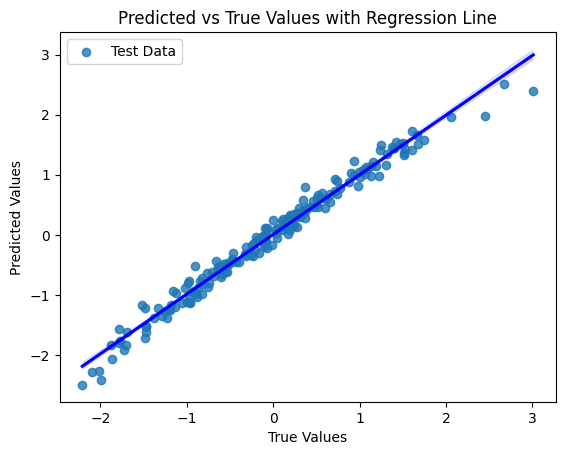

In [106]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.8}, line_kws={'color': 'blue'}, label='Test Data')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title("Predicted vs True Values with Regression Line")
plt.show()


### Visualize Relationship Between Features And Predictions

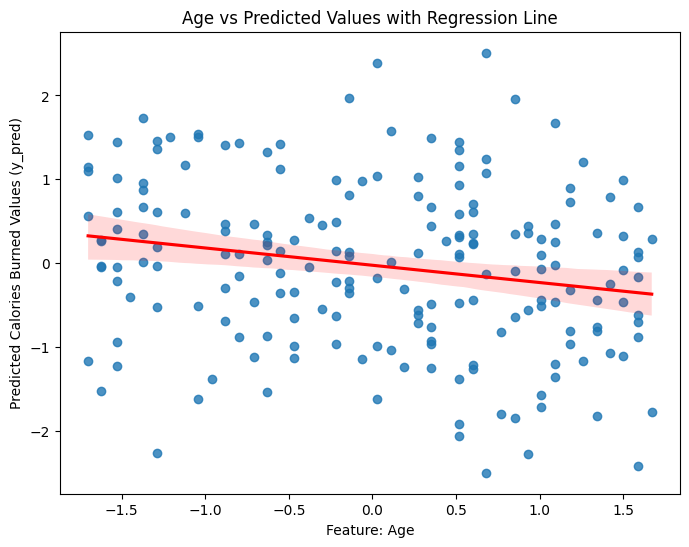

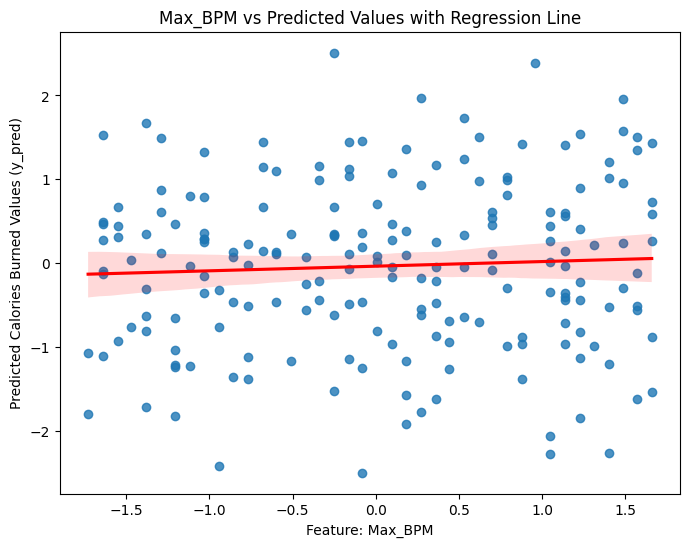

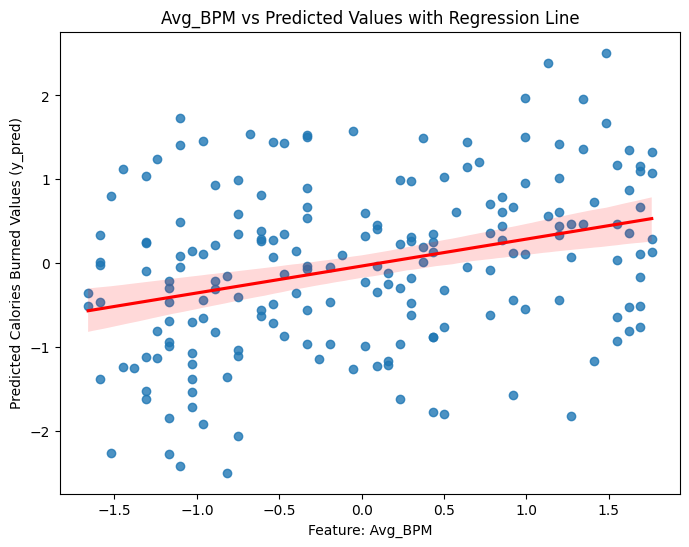

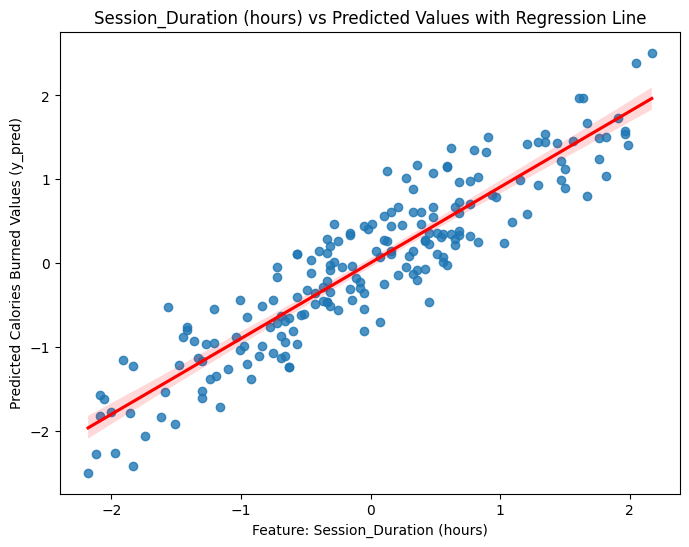

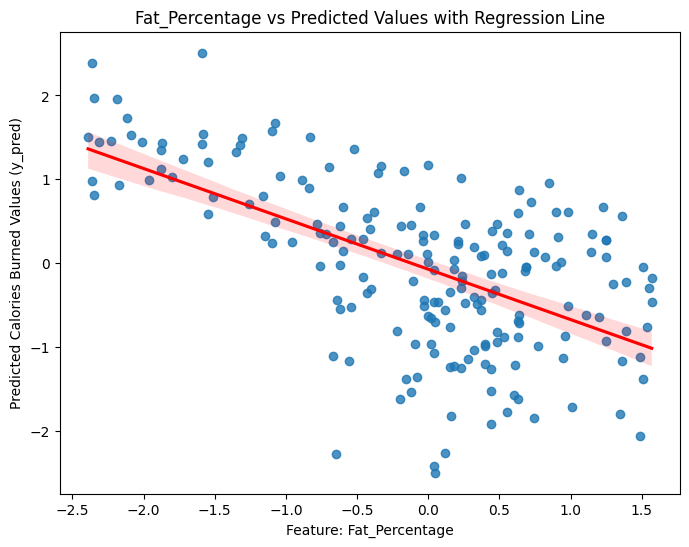

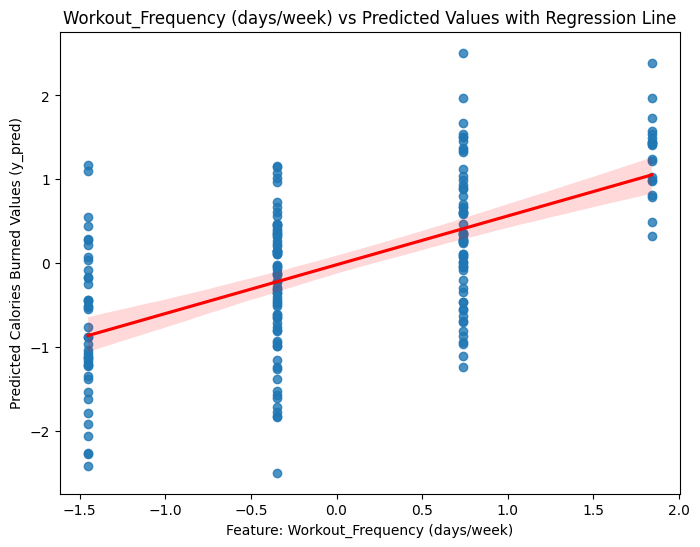

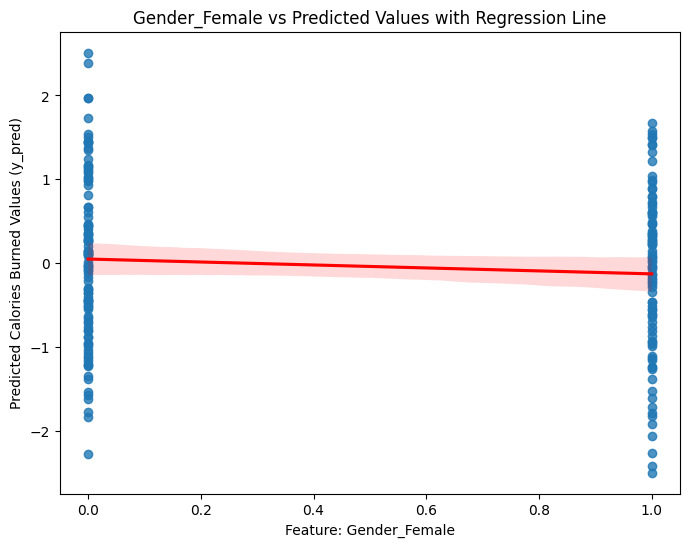

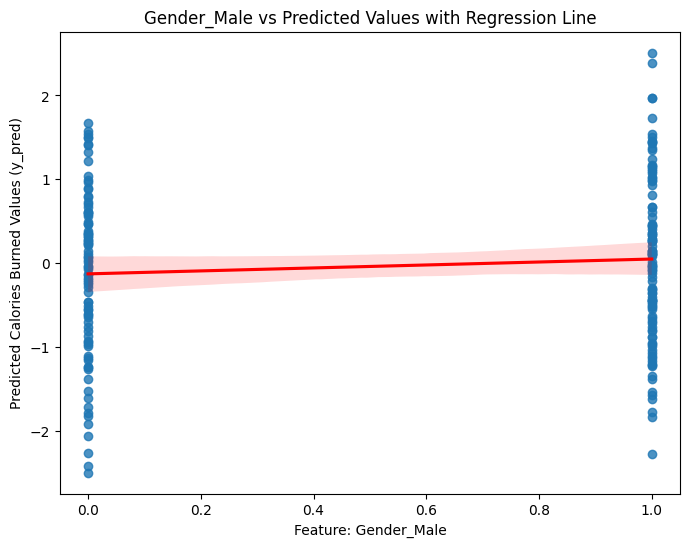

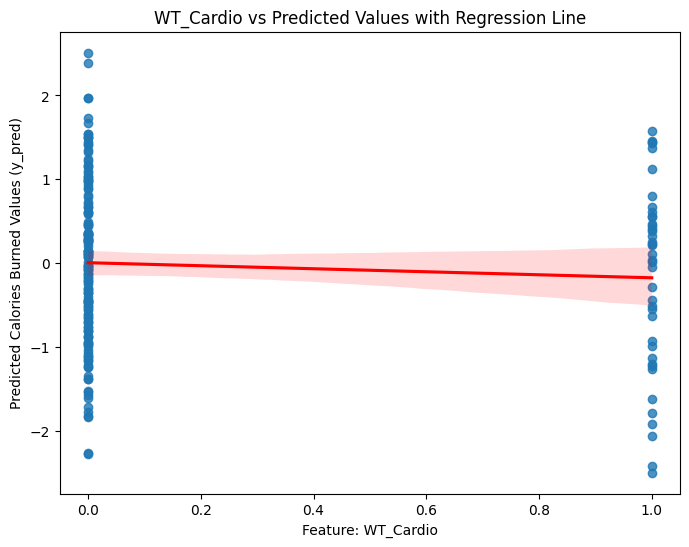

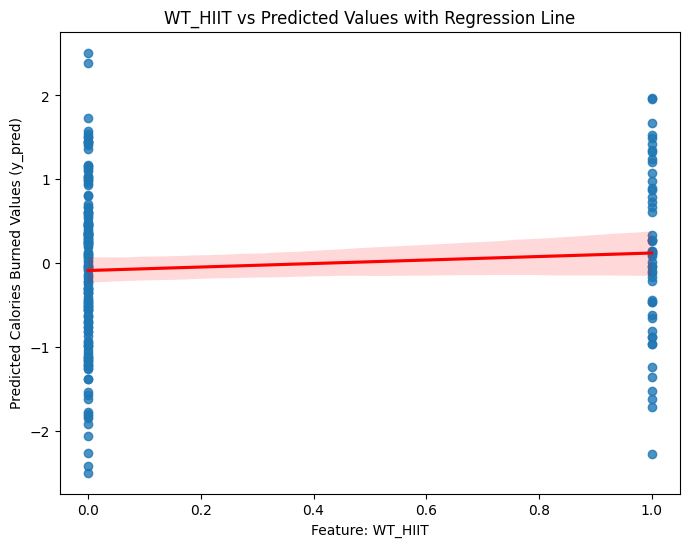

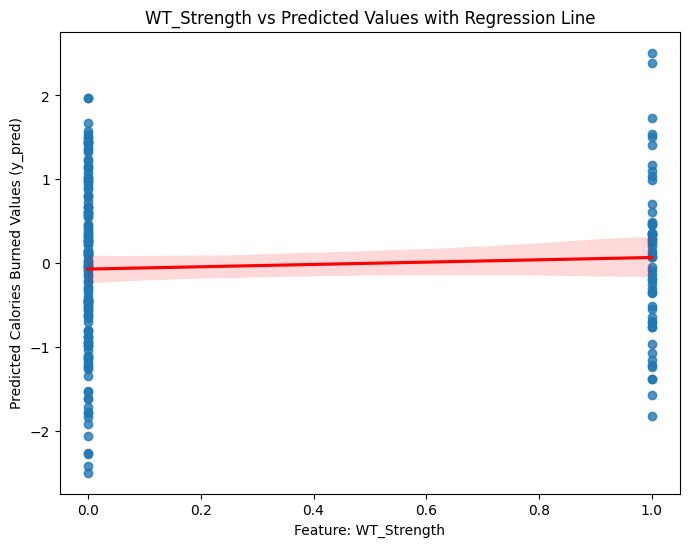

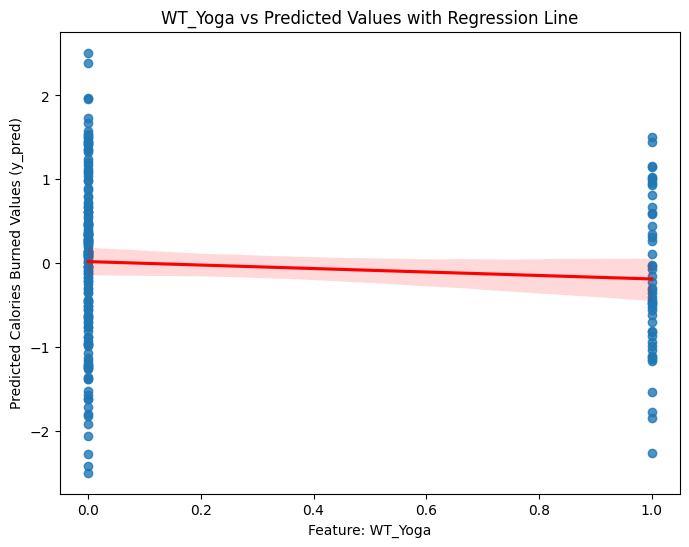

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each feature in x_test
for i, column in enumerate(x_test.columns):
    plt.figure(figsize=(8, 6))
    
    # Plot each feature against the predictions
    sns.regplot(x=x_test[column], y=y_pred, scatter_kws={'alpha':0.8}, line_kws={'color':'red'})
    
    # Set the labels and title
    plt.xlabel(f'Feature: {column}')
    plt.ylabel('Predicted Calories Burned Values (y_pred)')
    plt.title(f'{column} vs Predicted Values with Regression Line')
    
    # Show the plot
    plt.show()